每一折的得分：[1.         0.96666667 0.93333333 0.93333333 0.96666667]
平均得分：0.9600000000000002


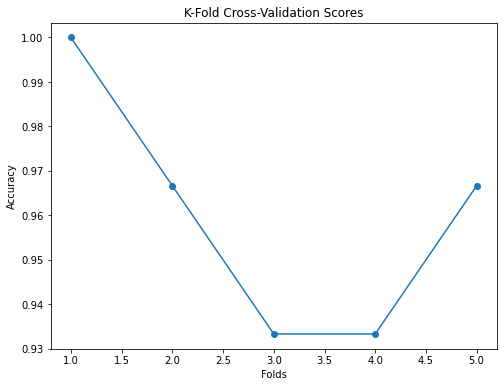

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

#加载数据集 def load_data()
iris=load_iris()
X=iris.data
y=iris.target

#初始化随机森林分类器 def load_model()
classifier=RandomForestClassifier(n_estimators=100,random_state=42)

#初始化
kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(classifier,X,y,cv=kf)

print(f'每一折的得分：{scores}')
print(f'平均得分：{scores.mean()}')

import matplotlib.pyplot as plt

folds=list(range(1,len(scores)+1))
plt.figure(figsize=(8,6))
plt.plot(folds ,scores,marker='o')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Scores')
plt.show()

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [2]:
#创建DataFrame
data={
    '真实标签':[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    '预测分数':[0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1]
}
df=pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,1,0.900
1,1,0.800
2,0,0.700
3,1,0.600
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


In [3]:
#按照预测分数降序排序
df_sorted=df.sort_values(by='预测分数',ascending=False)

#计算累积的真正例和假证例
cumulative_tp=df_sorted['真实标签'].cumsum()
cumulative_fp=(1-df_sorted['真实标签']).cumsum()
#计算总的真正例和假证例
total_tp=cumulative_tp.iloc[-1]
total_fp=cumulative_fp.iloc[-1]

#计算FPR和TPR
fpr=cumulative_fp/total_fp
tpr=cumulative_tp/total_tp

#计算AUC值
roc_auc=auc(fpr,tpr)

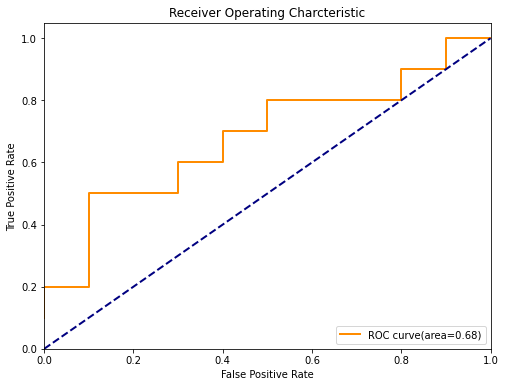

In [4]:
#绘制ROC曲线
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charcteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_setlection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

#加载数据集 def load_data()
iris=load_iris()
X=iris.data
y=iris.target

#初始化随机森林分类器 def load_model()
classifier=RandomForestClassifier(n_estimators=100,random_state=42)

#初始化
kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(classifier,X,y,cv=kf)

print(f'每一折的得分：{scores}')
print(f'平均得分：{scores.mean()}')

import matplotlib.pyplot as plt

folds=list(range(1,len(scores)+1))
plt.figure(figsize=(8,6))
plt.plot(fold,scores,marker='o')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Scores')
plt.show()

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
X=np.array([[50],[70],[82],[101],[120]])
y=np.array([300,500,610,702,800])
model=LinearRegression()
model.fit(X,y)
slope=model.coef_
intercept=model.intercept_
print(f'斜率（权重）：{slope[0]}')
print(f'截距（偏置）：{intercept}')

斜率（权重）：6.997414262384324
截距（偏置）：-9.581246597713744


预测的价格：
340.28946652150245
480.23775176918895
564.2067229178008
697.157593903103
830.1084648884051


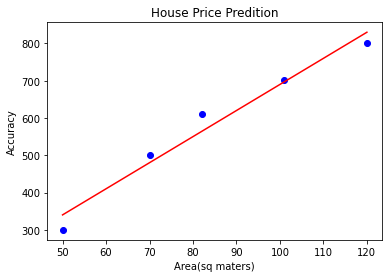

In [3]:
predictions=model.predict(X)
print('预测的价格：')
for pred in predictions:
    print(pred)
plt.scatter(X, y, color='blue')
plt.plot(X, predictions,color='red')
plt.xlabel('Area(sq maters)')
plt.ylabel('Accuracy')
plt.title('House Price Predition')
plt.show()